<h1 align="center">
    <img 
        src="./img/Microsoft-Logo.png" 
        width="400"/>
</h1>
<h1 align="center">
    <b>Practical Guide</b>
</h1>
<h4 align="center">
    for the creation of an AI Solution using an accelerator from the <a href="https://www.ds-toolkit.com/">Data Science Toolkit</a>
</h4>

# What to expect

* **Challenge 1:** *Automatically determine relevant features from the set of questions.*
* **Challenge 2:** *From the dataset, fill out the dataset of the new features defined.*
* **Challenge 3:** *Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs. Then apply SHAP to the newly created models.*

# Challenge 1: *Determine relevant features from the questions*

Here we will use the set of questions and leverage an LLM to determine what would be good features to try and understand the resulting metrics.

## Challenge 1 - Step 1:  Let's import the required packages and libraries.

> This is going to be done in a quiet mode, and only errors will be displayed if they occur. If you like to see what is going to be installed look at the [requirements.txt](./requirements.txt) file.

In summary two main tools will be installed that will be used in this notebook:

* **genAISHAP**. Is the library containing the tools for the DS Toolkit.
* **shap**. A popular library used to help with interpretability.

> Estimated time: 8.4s

In [1]:
import pandas as pd
from dotenv import load_dotenv
from genaishap import Featurizer, GenAIExplainer
import matplotlib.pyplot as plt
import shap
from IPython.display import Markdown, display, clear_output

import ipywidgets as widgets
from IPython.display import display

LOAD_PRECALCULATED_VALUES = True

load_dotenv()
shap.initjs()

### Some definitions:

* **Context prescision:** Measures how much of the generated output is relevant and aligns with the context provided in the input.
* **Context recall:** Measures how much of the relevant information in the input context is included in the output.
* **Faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding "hallucinations" (made-up or false information).

Below, the dataset of questions, retrieved contexts, generated and expected responses and their corresponding metrics is presented. Remember that this dataset is generated following the same procedure explained in the previous notebook.

In [2]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_test_dataset.head(10)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0
5,How many EV charging locations were there on G...,[This guidance does not recognize existing ren...,The provided context does not specify the numb...,200000,1.000000,0.0,0.0
6,On what page of the report can I find the perf...,"[Employee Recruitment, Inclusion and Performan...",The performance highlights for the Empowering ...,The performance highlights for Empowering User...,0.000000,0.0,0.0
7,Can you please provide for me the glossary of ...,[GRI INDEX\nGRI 304 - Biodiversity\nGRI 103 Ma...,I'm unable to provide the glossary of the docu...,"Sure, here is the glossary:\nGlossary\nCFE: ca...",0.500000,0.0,0.0
8,On what page can I find details about Amazons ...,[IntroductionSustainability\nDriving Climate S...,You can find details about Amazon's climate so...,You can find information on driving climate so...,0.000000,0.0,0.0
9,"For the listed Renewable Energy goals, by when...",[IntroductionSustainability\nDriving Climate S...,Amazon intends to have all operations powered ...,Amazon set the goal of becoming powered by 100...,1.000000,1.0,0.0


See an example question below:

In [3]:
df_test_dataset.iloc[1,0]

"What percentage of waste from Google's offices globally were diverted away from landfills in 2021?"

## Challenge 1 - Step 2: Let's extract features from the questions in the dataset

* To do this, we will use the function `Featurizer` from the **genAISHAP** library.
* The features created are then displayed. Remember that these features are generated automatically.

**GenAISHAP** has a utility to automatically create features from the `user_input` entries. This tool, called **featurizer**, works by using an LLM to go through the existing questions in the dataset and extracts what would be relevant pieces of information that would be useful as features in a regression model.

In [4]:

# The Featurizer is part of the DS Toolkit and is able to take the list of provided questions and create a dataset of features for them automatically.
featurizer = Featurizer.from_pandas(df_test_dataset)
featurizer.create_features_using_azure_openai(
    deployment_name="gpt-4o", # Update with the name of your Azure OpenAI LLM deployment name
    num_features=25
)
print(featurizer.features.model_dump_json(indent=4))

{
    "features": [
        {
            "feature": "there_is_any_company_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_companies_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_year_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_years_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_page_number_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_page_numbers_identified_in_the_question",
            "ftype": "list_of_strings"
        },
        {
            "feature": "there_is_any_metric_or_value_identified_in_the_question",
            "ftype": "boolean"
        },
        {
            "feature": "list_of_metrics_or_values_identified_in_t

# Challenge 2: From the dataset, fill out the dataset of the new features defined.

**GenAISHAP** also includes another utility to automatically fill out the values for each user input for each feature. Once more, we leverage an LLM to fill out each of the features for each of the questions. It works like answering questions about the question (e.g., if the feature is `is_Microsoft_mentioned`, it literally checks if Microsoft is mentioned in the question).

> Estimated time: 55s

In [5]:
featurizer.fill_out_features_using_azure_openai(
    deployment_name="gpt-4o", 
    batch_size=5
)

  0%|          | 0/10 [00:00<?, ?it/s]

In [6]:
# We provide the option to use a precalculated set of features to speed up the process
 
if LOAD_PRECALCULATED_VALUES:
    df_features = pd.read_json('./test-features.json', orient='records')
else:
    df_features = featurizer.to_pandas()
    
df_test_dataset.join(df_features).head()

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_company_identified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_topic_or_section_identified_in_the_question,...,is_a_question_related_to_achievements_or_highlights,is_a_question_related_to_goals_or_targets,is_a_question_related_to_specific_initiatives,list_of_initiatives_identified_in_the_question,is_a_question_related_to_comparisons,is_a_question_related_to_quantitative_data,list_of_quantitative_data_identified_in_the_question,is_a_question_related_to_qualitative_data,list_of_qualitative_data_identified_in_the_question,is_a_question_related_to_testimonials_or_quotes
0,Can you provide for me the three highlights fo...,"[31. In 2018, to align with industry best prac...",The three highlights for the GHG emissions sec...,"Sure, they are: \n1. 65% cumulative GHG emissi...",1.000000,0.0,0.0,False,[],True,...,True,False,False,[],False,False,[],True,[highlights],False
1,What percentage of waste from Google's offices...,[Performance highlights\nThe following section...,"In 2021, 78% of waste from Google's global dat...",Sixty-four percent.,1.000000,0.0,0.0,True,[Google],True,...,True,False,False,[],False,True,[percentage of waste diverted],False,[],False
2,Can you present me with the performance highli...,"[Education\nFor more than 40 years, we’ve work...",The performance highlights for empowering user...,Sure! The Performance Highlights for Empowerin...,1.000000,0.0,0.0,False,[],True,...,True,False,False,[],False,False,[],True,[highlights],False
3,What was the listed key achievement regarding ...,[Our approach\nWe believe that every business ...,There is no listed key achievement for Google ...,"In 2017, Google became the first major company...",1.000000,1.0,1.0,True,[Google],True,...,True,False,False,[],False,False,[],True,[key achievement],False
4,Did Google reach its intended Waste target und...,[BUILDING BETTER DEVICES AND SERVICES\nTarget ...,"Yes, in 2021, Google achieved the UL 2799 Zero...","No, this target has not been met in 2021. Howe...",0.666667,1.0,1.0,True,[Google],True,...,True,True,True,[Building Better Devices and Services Initiative],False,False,[],True,[intended target],False


# Challenge 3: 
## Challenge 3 - Step 1: Fit and evaluate regression models using the features of the previous step as inputs and the metrics evaluated as outputs.

**GenAISHAP** will create regression models, which we call black-box models, for each of the metrics using the features as input variables and the calculated metrics as output variables:

$ \hat{\bold{y}} = f(\bold{X})$

With $\hat{\bold{y}}$ the metric calculated by the black-box model $f()$ and the regressors $\bold{X}$ as inputs. Note that $\bold{X}$ are the features automatically generated in the previous steps, while the original $\bold{y}$ are the metrics obtained from RAGAS in the previous notebook.

Then, it will use those black-box models to produce explanations for each metric using SHAP.

The following cell includes 3 lines:
* The first line initialices the object `GenAIExplainer` with the information from the test dataset and the features generated in the previous steps.
* The next one executes the **feaure engineering** where the features are converted to numerical features mainly using **one-hot vector encoding**.
* Finally, multiple regression models are trained and optimized for each metric and the best is chosen for each metric in order to create the **SHAP explainers**.


> Estimated time: 1m

In [7]:
genai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)
genai_explainer.feature_engineering()
genai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric faithfulness far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric context_precision far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

c:\Users\vscode\src\repos\tc-2025\.venv\lib\site-packages\genaishap\explainer.py:298: UserWarning: There are 3 estimated values in the metric context_recall far from the original values. The following is the list of indexes [25, 26, 27].
  warnings.warn(


### Show the `r2 score` of the selected models

In [8]:
genai_explainer.r2_scores_

{'faithfulness': 0.8924309799394129,
 'context_precision': 0.984284771295884,
 'context_recall': 0.9315666388314134}

### Let's select one of our metrics
1. Select on of the metrics from the dropdown menu below.
2. Check how well the regression model created with the automated features follows the selected metric. This should give us an idea about how reliable our explanations are.

Dropdown(description='Select:', index=1, options=('', 'faithfulness', 'context_precision', 'context_recall'), …


### **faithfulness:** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)


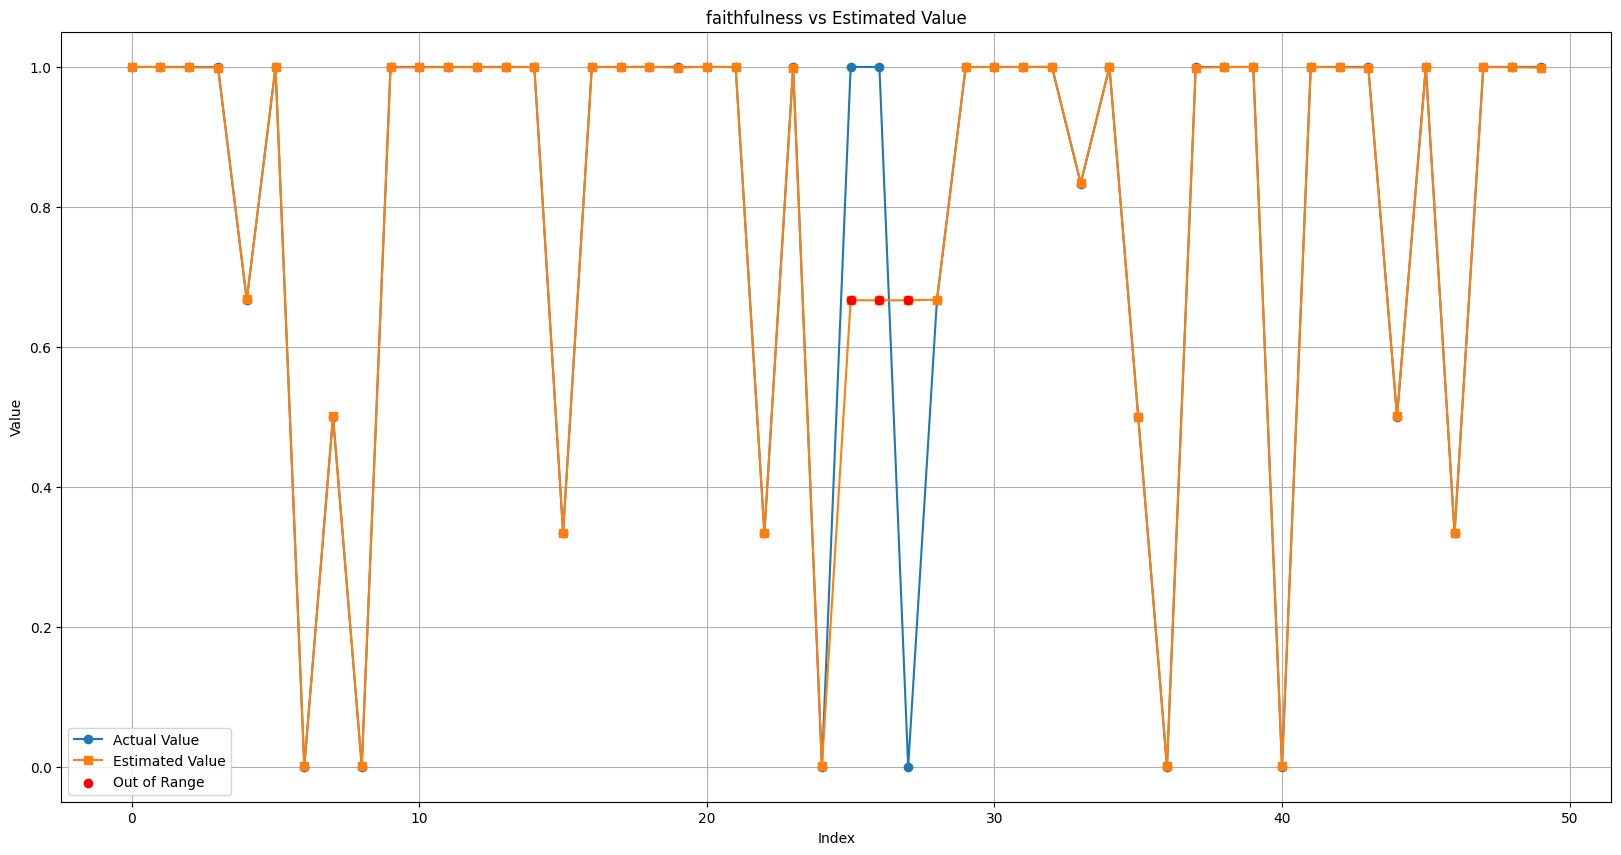

In [9]:
dropdown_values = ["", "faithfulness", "context_precision", "context_recall"]

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=dropdown_values,
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_metric
    global metric
    global X
    global metric_text
    global df_metric
    sel_metric = change['new']
    # print(f'Selected metric: {sel_metric}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    if sel_metric == "faithfulness":
        metric_text = "Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)"
    elif sel_metric == "context_precision":
        metric_text = "Measures how much of the generated output is relevant and aligns with the context provided in the input."
    elif sel_metric == "context_recall":
        metric_text = "Measures how much of the relevant information in the input context is included in the output."
    
    metric_details = f"""
### **{sel_metric}:** {metric_text}
"""
    # Display a reminder of the metric's definition
    display(Markdown(metric_details))

    # Plot the actual vs estimated values for the selected metric
    metric = sel_metric
    X = pd.DataFrame(genai_explainer.preprocessed_features)

    df_metric = pd.DataFrame(genai_explainer.metrics)[[metric]]
    df_metric['estimated_value'] = genai_explainer.estimators_[metric].predict(X)
    df_metric['is_out_of_range'] = genai_explainer.is_out_of_range_[metric]



    plt.figure(figsize=(20,10))
    plt.plot(df_metric[metric], label='Actual Value', marker='o')
    plt.plot(df_metric['estimated_value'], label='Estimated Value', marker='s')

    # Highlight the out-of-range values
    out_of_range_indices = df_metric[df_metric['is_out_of_range']].index
    plt.scatter(out_of_range_indices, df_metric.loc[out_of_range_indices, 'estimated_value'], color='red', label='Out of Range', zorder=5)

    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{metric} vs Estimated Value')
    plt.legend()
    plt.grid(True)
    plt.show()
# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')



display(dropdown)

## Challenge 3 - Step 2: Present the explainability results from SHAP

SHAP (SHapley Additive exPlanations) is a method used to explain the output of machine learning models. It leverages concepts from cooperative game theory to assign each feature an importance value for a particular prediction. SHAP values provide insights into how each feature contributes to the model's output, making it easier to understand and interpret complex models.
In this case, we will use SHAP on top of the models of the metrics we created in the previous steps.

### For the selected metric show the SHAP values of each feature.

`shap.summary_plot` is a function in the SHAP library that visualizes the importance of features in a machine learning model. It provides a summary of the SHAP values for all features, using a combination of dot plots and bar charts. This plot helps to quickly identify which features have the most significant impact on the model's predictions.

In the plot below each dot represents a SHAP value for a feature in a specific instance (data point). Here's how to interpret the dots and colors:

* Dots:
Each dot corresponds to a single instance's SHAP value for a particular feature.
The **position** of the dot on the x-axis shows the **SHAP value**, indicating the impact of that feature on the prediction. Dots further to the right (positive SHAP values) indicate a positive impact on the prediction, while dots further to the left (negative SHAP values) indicate a negative impact.
* Colors:
The **color** of each dot represents the **feature value** for that instance.
In our case, a color gradient (e.g., blue to red) is used, where one end of the spectrum (i.e., blue) represents low feature values and the other end (i.e., red) represents high feature values.
This coloring helps to understand the relationship between the feature value and its impact on the prediction. For example, if red dots (high feature values) are mostly on the right, it indicates that high values of that feature increase the prediction.

By examining the distribution and color of the dots, you can gain insights into how different feature values influence the model's predictions.

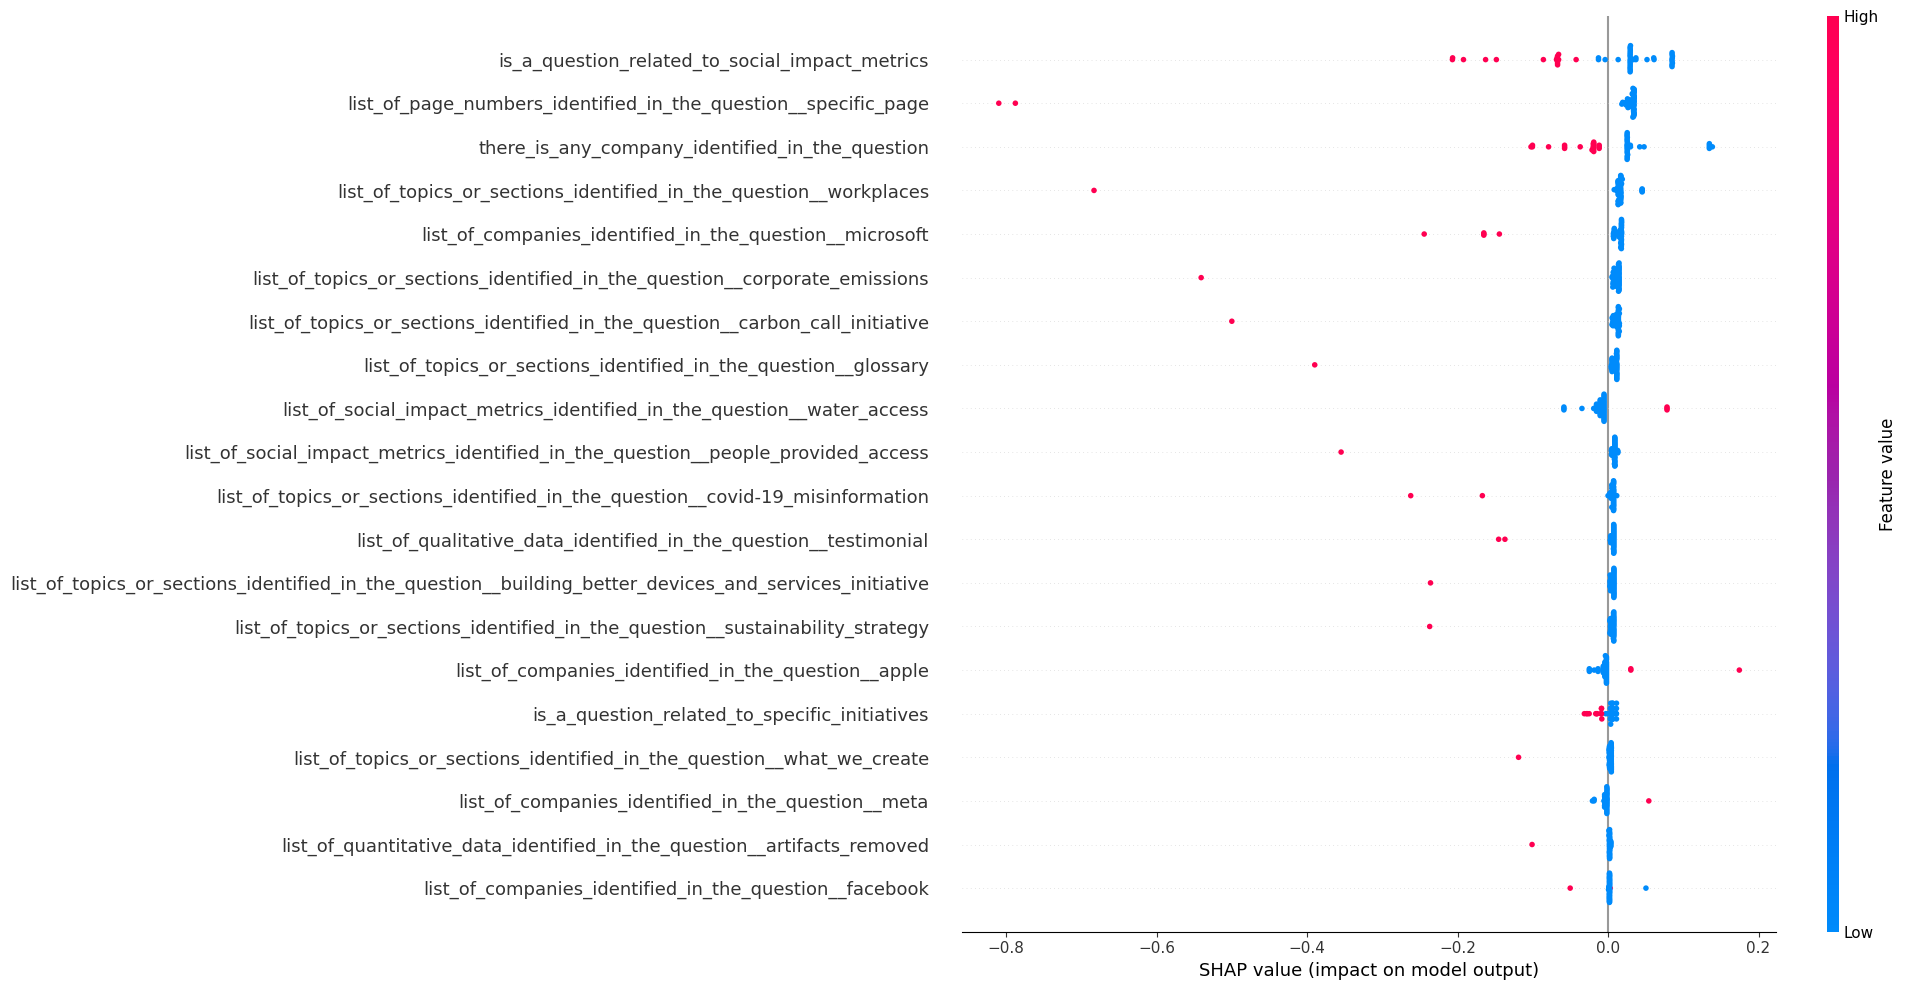

In [10]:
metric_explainer = genai_explainer.explainers_[metric]
shap_values = metric_explainer(X)
shap.summary_plot(shap_values, X, plot_size=(20,10))

### Now let's select one question

For the selected question, display the question, the retrieved contexts, the generated and expected answers, the metric value and the predicted metric from the model trained

Also, show the SHAP values for the selected question (for the previously selected metric). 
`shap.waterfall_plot` is a function in the SHAP library that visualizes the contribution of **each feature to a single prediction**. It breaks down the prediction into the base value (average model output) and the impact of each feature's SHAP value, showing how each feature pushes the prediction higher or lower. This plot helps to understand the specific reasons behind an individual prediction by displaying the cumulative effect of each feature.

Dropdown(description='Select:', options=(('Can you provide for me the three highlights for the GHG emissions s…


### INDEX 0

**USER INPUT:**
Can you provide for me the three highlights for the GHG emissions section of the Advancing Carbon-Free Energy Performance Highlights?

**RETRIEVED CONTEXT:**


**CHUNK 1:**

31. In 2018, to align with industry best practices for Scope 3 reporting, we extended our reporting boundaries to include emissions associated with food served in our offices, hardware 
manufacturing emissions beyond Tier 1 suppliers (full upstream to the point of extraction), use of sold products, and end-of-life treatment of sold products. Google’s hardware includes 
data center servers, networking equipment, and consumer hardware products. These extended categories have been reported annually from 2018 onward.
32. In 2020, due to the global pandemic, we began to estimate and report on our emissions associated with teleworking (i.e., employees working remotely). We applied the estimation 
methodology outlined in EcoAct’s Homeworking Emissions Whitepaper to our annual average workforce to estimate the GHG emissions generated by employees working remotely 
from their homes. Teleworking emissions are reported as part of our Scope 3 emissions for employee commuting, per Greenhouse Gas Protocol’s Technical Guidance for Calculating 
Scope 3 Emissions (version 1.0). For a breakdown of our operational Scope 3 emissions by category, see our 2021 Independent Accountants’ Review Report.
33. In 2020, we began reporting teleworking emissions as part of our Scope 3 employee commuting emissions. Scope 3 (business travel and employee commuting) emissions  
reported prior to 2020 do not include teleworking emissions.
34. See note 31 above.
35. We calculate two metrics for operational emissions, one using market-based Scope 2 and one using location-based Scope 2. The Scope 2 market-based and location-based amounts 
have been third-party assured by Ernst & Young LLP, as shown in the Schedule of Select Environmental Indicators attached to the 2021 Independent Accountants’ Review Report.  
In the 2021 Independent Accountants’ Review Report, the Schedule of Operational GHG emissions After Compensation Adjustments only includes the market-based metric.
36. In 2016, we adopted the industry practice of including only operational emissions in our carbon neutrality commitment. For more information, see our 2017 white paper,  
10 Years of Carbon Neutrality. In 2020, we extended our operational emissions boundary to include teleworking emissions. The operational emissions included in our carbon  
neutrality commitment now include Scope 1, Scope 2 (market-based), and Scope 3 (business travel and employee commuting, including teleworking).
37. Emissions reduced by renewable energy PPAs are calculated by subtracting Scope 2 market-based method (MBM) GHG emissions from Scope 2 location-based method GHG 
emissions, thereby representing emissions reductions from renewable energy PPAs and MBM emission factors.
38. See note 36 above.
39. Carbon intensity metrics are based on gross global combined Scope 1 and market-based Scope 2 emissions. For more information on year-over-year changes to market-based  
Scope 2 emissions, see note 29 above.
40. Total energy consumption includes all fuel and natural gas consumption, purchased electricity, purchased heating, and all electricity generated on-site from renewable sources.
41. Percentage of renewable energy is calculated on a calendar-year basis, comparing the volume of renewable electricity (in megawatt-hours) procured for our global operations  
(i.e., renewable energy procured through our PPA contracts, on-site renewable energy generation, and renewable energy in the electric grids where our facilities are located) with the 
total volume of electricity consumed by our operations. This metric includes all renewable energy purchased, regardless of the market in which the renewable energy was consumed. 
Prior to 2016, we were not accounting for the renewable electricity purchased through grid electricity.
42. The Greenhouse Gas Protocol’s Scope 2 Guidance requires energy attribute certificates to be sourced from and applied to the same market in which the reporting entity’s  
electricity-consuming operations are located. This guidance does not recognize existing renewable energy on the electric grids where an entity’s operations are located.
43. Our carbon-free energy (CFE) percentage measures the degree to which our electricity consumption on a given regional grid is matched with CFE on an hourly basis. This is calculated 
using both CFE under contract by Google as well as CFE coming from the overall grid mix. CFE coming from the overall grid mix is based on data obtained from a third-party, 
electricityMap, and has not been assured. For more information, see our 2021 white paper, 24/7 Carbon-Free Energy: Methodologies and Metrics.
44. Landfill diversion is calculated as waste diverted to a more sustainable pathway than landfill or incineration without energy recovery.
45.

**CHUNK 2:**

Some GHGs are more potent than others, as measured by their GWP. Carbon 
dioxide is the baseline and thus has a GWP of 1.
28. Since 2010, we’ve procured renewable energy for our operations, and in 2012, we began publishing how this reduces our overall emissions. Until 2015, there was no guidance from the 
Greenhouse Gas Protocol on how to account for these emissions reductions, so we developed our own methodology, whereby on an annual basis we assigned renewable electricity 
procured against electricity consumed (in megawatt-hours) in the closest data center to the renewable energy project. In 2015, the Greenhouse Gas Protocol released updated  
Scope 2 guidance for the accounting of purchased electricity, steam, heat, and cooling, which we adopted, starting with 2015 data.
29. Google currently buys enough renewable energy to match our annual global electricity consumption. To achieve our 100% renewable energy match goal, we first consider both 
our on-site renewable energy generation and the renewable energy that is already in the electric grids where our facilities are located, then procure renewable energy through PPA 
contracts. We have a few facilities located in geographies where we’re not currently able to source large volumes of renewable energy, so we currently make up for this by buying 
surplus renewable energy in regions where it’s abundant. For example, by buying larger amounts of wind energy in places like Europe, we compensate for our lack of renewable energy 
purchases in Asia. This approach results in Google’s Scope 2 market-based emissions being greater than zero as per the Greenhouse Gas Protocol Scope 2 Guidance, despite us 
achieving our 100% renewable energy match globally. To work toward eliminating GHG emissions associated with our electricity use (Scope 2 market-based emissions), we set the 
ambitious goal of achieving 24/7 carbon-free energy by 2030. To attain this, we’re evolving from matching our annual energy consumption with renewable energy to sourcing  
carbon-free energy every hour of every day, everywhere.
30. See note 25 above.
14
Google Environmental Report 2022

**RESPONSE:**
The three highlights for the GHG emissions section of the Advancing Carbon-Free Energy Performance include:

1. Google extended its reporting boundaries in 2018 to include emissions from various sources such as food served in offices, hardware manufacturing beyond Tier 1 suppliers, use of sold products, and end-of-life treatment of sold products.

2. In 2020, Google began estimating and reporting emissions associated with teleworking due to the global pandemic, incorporating these into their Scope 3 emissions for employee commuting.

3. Google has set an ambitious goal to achieve 24/7 carbon-free energy by 2030, evolving from matching annual energy consumption with renewable energy to sourcing carbon-free energy every hour of every day, everywhere.

**REFERENCE:**
Sure, they are: 
1. 65% cumulative GHG emissions reduction
2. 81% decrease in carbon intensity
3. 15 years of carbon neutrality

**METRIC → faithfulness :** Measures how accurate and truthful the generated output is in relation to the input context and factual correctness. Faithfulness is about avoiding hallucinations (made-up or false information)

**METRIC Value:** 1.000

**MODEL ESTIMATED Value:** 1.000


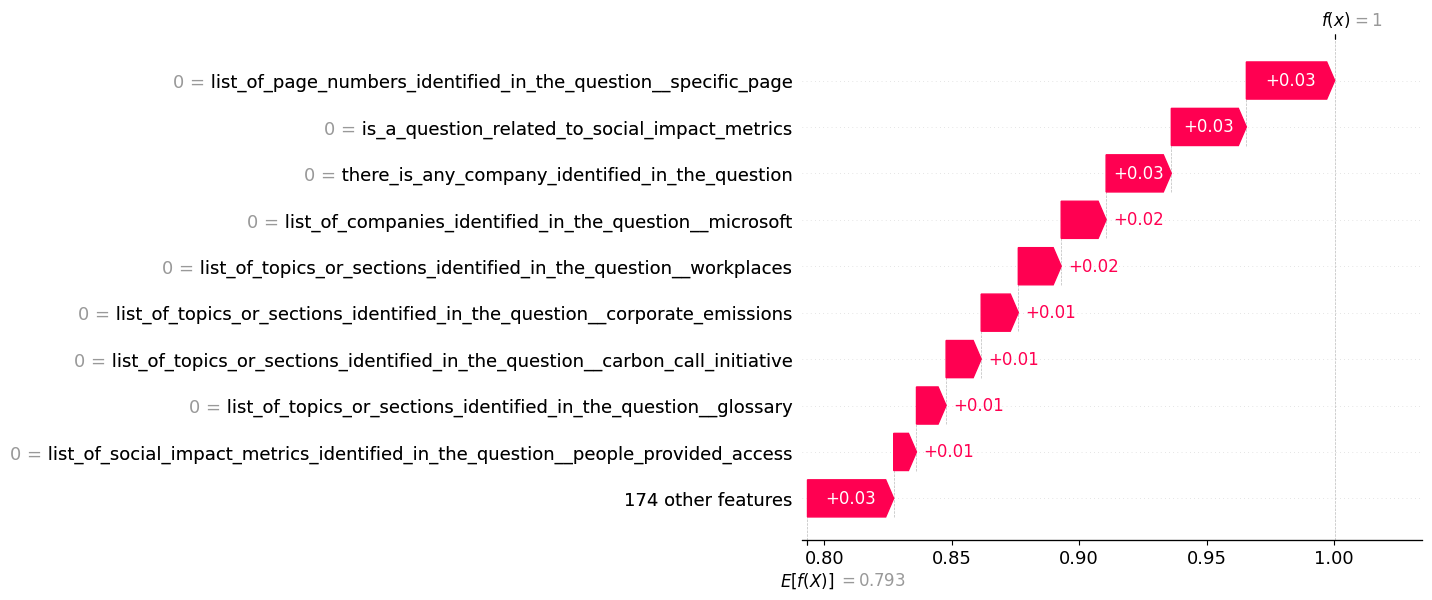

In [11]:
# Define the dropdown values
dropdown_values = df_test_dataset.iloc[:, 0].tolist()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=[(value, index) for index, value in enumerate(dropdown_values)],
    description='Select:',
    disabled=False,
)

# Function to handle the dropdown selection
def on_change(change):
    global sel_question
    sel_question = change['new']
    # print(f'Selected question: {sel_question}')

    # Clear the previous output
    clear_output(wait=True)
    
    # Display the dropdown widget again
    display(dropdown)

    # Display the details of the selected question
    index = sel_question

    context = df_test_dataset.loc[index,'retrieved_contexts']
    context_str = "\n".join([f"\n**CHUNK {i+1}:**\n\n{c}" for i, c in zip(range(len(context)),context)])

    index_details = f"""
### INDEX {index}

**USER INPUT:**
{df_test_dataset.loc[index,'user_input']}

**RETRIEVED CONTEXT:**

{context_str}

**RESPONSE:**
{df_test_dataset.loc[index,'response']}

**REFERENCE:**
{df_test_dataset.loc[index,'reference']}

**METRIC → {metric} :** {metric_text}

**METRIC Value:** {df_test_dataset.loc[index, metric]:.3f}

**MODEL ESTIMATED Value:** {df_metric.loc[index, 'estimated_value']:.3f}
"""

    display(Markdown(index_details))
    shap.waterfall_plot(shap_values[index])

# Attach the function to the dropdown widget
dropdown.observe(on_change, names='value')

# Display the dropdown widget
display(dropdown)